In [123]:
import numpy as np
import random
import time
from numpy import float128
import matplotlib.pyplot as plt

In [124]:
matrix_time_list=[]
const_time_list=[]
summ_time_list=[]
pr_time_list=[]
native_time_list=[]
gorner_time_list=[]
qs_time_list=[]
timsort_time_list=[]
bubble_time_list=[]

for i in range (1, 50):
    random_value=random.uniform(0, 0.000000010)
    array=np.random.random_sample((i))
    #print(array)
    print("Итерация: "+str(i))
    #f(v)=const
    
    
    res_time=0
    for t in range(5):
        start_time = time.time()
        f=5
        current_time=time.time() - start_time
        print("Current time: "+str('{:0.9f}'.format(current_time)))
        res_time=res_time+current_time
    const_time_list.append(res_time/5)
    print("Mean time: "+'{:0.9f}'.format(res_time/5))
    
    #Сумма    
    
    res_time=0
    for t in range(5):
        start_time = time.time()
        summ=0
        for el in array:
            summ=summ+el
        #print("Сумма:")
        #print(summ) 
        #print("Время, с:")
        #print('{:0.9f}'.format(time.time() - start_time))  
        current_time=time.time() - start_time
        print("Current time: "+str('{:0.9f}'.format(current_time)))
        res_time=res_time+current_time
    summ_time_list.append(res_time/5)
    print("Mean time: "+'{:0.9f}'.format(res_time/5))
    
    #Произведение
    
    res_time=0
    for t in range(5):
        start_time = time.time()
        res=1
        for el in array:
            res=res*el
        #print("Произведение: "+str(res))
        #print("Время, с:")
        #print('{:0.9f}'.format(time.time() - start_time))
        current_time=time.time() - start_time
        print("Current time: "+str('{:0.9f}'.format(current_time)))
        res_time=res_time+current_time
    pr_time_list.append(res_time/5)
    print("Mean time: "+'{:0.9f}'.format(res_time/5))
    
     
    #каждый элемент - коэфф. многочлена
    
    res_time=0
    res_time2=0
    for i in range (5):
        start_time = time.time()
        new_res=float128(0)
        for j in range (1, len(array)+1):
            temp=float128(1)
            for t in range(j-1):
                temp=temp*1.5
            new_res=new_res+array[j-1]*temp
        #print("Прямой метод:")
        #print(new_res)
        #print("Время, с:")
        #print('{:0.9f}'.format(time.time() - start_time))
        res_time=res_time+float('{:0.9f}'.format(time.time() - start_time))

        start_time = time.time()
        n=len(array)-1
        if n!=0 and n!=1:
            res=1.5*array[n]+array[n-1]
            for k in list(reversed(range(len(array)-2))):
                res=float128(array[k]+1.5*res)            
        if n==0:
            res=array[0]
        if n==1:
            res=array[1]*1.5+array[0]
        #print("Горнер метод:")
        #print(res)
        #print("Время, с:")
        #print('{:0.9f}'.format(time.time() - start_time))
        res_time2=res_time2+float('{:0.9f}'.format(time.time() - start_time))
    #print("Прямой метод:")
    native_time_list.append(res_time/5)
    print('{:0.9f}'.format(res_time/5))
    #print("Горнер метод:")
    gorner_time_list.append(res_time2/5)
    print("Mean time: "+'{:0.9f}'.format(res_time2/5))
    
 
    
    #quicksort
    
    res_time=0
    for t in range(5):
        start_time = time.time()
        array_copy=np.copy(array)
        less = []
        equal = []
        greater = []
        if len(array_copy) > 1:
            center = array_copy[0]
            for x in array_copy:
                if x < center:
                    less.append(x)
                elif x == center:
                    equal.append(x)
                elif x > center:
                    greater.append(x)
            result=quick_sort(less)+equal+quick_sort(greater)
        else: 
            result=array
        current_time=time.time() - start_time
        print("Current time: "+str('{:0.9f}'.format(current_time)))
        array_copy=None
        res_time=res_time+current_time
    qs_time_list.append(res_time/5)
    print("Mean time: "+'{:0.9f}'.format(res_time/5))     
        
    
    #timsort - стандартный для python    
    
    res_time=0
    for t in range(5):
        start_time = time.time()
        result=sorted(array)
        current_time=time.time() - start_time
        print("Current time: "+str('{:0.9f}'.format(current_time)))
        res_time=res_time+current_time
    timsort_time_list.append(res_time/5)
    print("Mean time: "+'{:0.9f}'.format(res_time/5))
    
    
    #сортировка пузырьком
    
    
    res_time=0
    for t in range(5):
        start_time = time.time()
        array_copy=np.copy(array)
        length = len(array_copy) - 1
        finished = False
        while not finished:
            finished = True
            for i in range(length):
                if array_copy[i] > array_copy[i+1]:
                    finished = False
                    array_copy[i], array_copy[i+1] = array_copy[i+1], array_copy[i]
        current_time=time.time() - start_time
        print("Current time: "+str('{:0.9f}'.format(current_time)))
        array_copy=None
        res_time=res_time+current_time
    bubble_time_list.append(res_time/5)
    print("Mean time: "+'{:0.9f}'.format(res_time/5))          

    
    matrix_A=np.random.rand(i,i)
    matrix_B=np.random.rand(i,i)
    #print(matrix_A)
    #print(matrix_B)
    
    
    res_time=0
    for t in range(5):
        start_time = time.time()
        summ=0     #сумма
        temp_m=[]    #временная матрица
        result_m=[] # конечная матрица
        for z in range(0,i):
            for j in range(0,i):
                for h in range(0,i):
                   summ=summ+matrix_A[z][h]*matrix_B[h][j]
                temp_m.append(summ)
                summ=0
            result_m.append(temp_m)
            temp_m=[]           
        #print(np.array(result_m))
        current_time=time.time() - start_time
        print("Current time: "+str('{:0.9f}'.format(current_time)))
        array_copy=None
        res_time=res_time+current_time
    matrix_time_list.append(res_time/5)
    print("Mean time: "+'{:0.9f}'.format(res_time/5))


Итерация: 1
Current time: 0.000000477
Current time: 0.000000238
Current time: 0.000000238
Current time: 0.000000000
Current time: 0.000000000
Mean time: 0.000000191
Current time: 0.000026703
Current time: 0.000002623
Current time: 0.000001907
Current time: 0.000002146
Current time: 0.000001907
Mean time: 0.000007057
Current time: 0.000002861
Current time: 0.000001907
Current time: 0.000001669
Current time: 0.000001669
Current time: 0.000001907
Mean time: 0.000002003
0.000011301
Mean time: 0.000000954
Current time: 0.000024080
Current time: 0.000004768
Current time: 0.000004768
Current time: 0.000004053
Current time: 0.000004530
Mean time: 0.000008440
Current time: 0.000003815
Current time: 0.000002146
Current time: 0.000001431
Current time: 0.000001431
Current time: 0.000001669
Mean time: 0.000002098
Current time: 0.000005007
Current time: 0.000004768
Current time: 0.000004530
Current time: 0.000004530
Current time: 0.000004053
Mean time: 0.000004578
Current time: 0.000210285
Current t

Current time: 0.006103039
Current time: 0.005690098
Current time: 0.005860567
Mean time: 0.005863428
Итерация: 21
Current time: 0.000000715
Current time: 0.000000238
Current time: 0.000000000
Current time: 0.000000238
Current time: 0.000000238
Mean time: 0.000000286
Current time: 0.000014782
Current time: 0.000006914
Current time: 0.000006914
Current time: 0.000006676
Current time: 0.000006914
Mean time: 0.000008440
Current time: 0.000007868
Current time: 0.000006676
Current time: 0.000006437
Current time: 0.000006676
Current time: 0.000006199
Mean time: 0.000006771
0.000157738
Mean time: 0.000065231
Current time: 0.000049591
Current time: 0.000031233
Current time: 0.000030041
Current time: 0.000030041
Current time: 0.000030041
Mean time: 0.000034189
Current time: 0.000006914
Current time: 0.000005245
Current time: 0.000005245
Current time: 0.000005007
Current time: 0.000005007
Mean time: 0.000005484
Current time: 0.000213385
Current time: 0.000218391
Current time: 0.000210524
Current 

Current time: 0.021824121
Current time: 0.023103952
Current time: 0.021035194
Current time: 0.020920277
Current time: 0.020855427
Mean time: 0.021547794
Итерация: 31
Current time: 0.000000715
Current time: 0.000000477
Current time: 0.000000238
Current time: 0.000000477
Current time: 0.000000000
Mean time: 0.000000381
Current time: 0.000015736
Current time: 0.000010014
Current time: 0.000009537
Current time: 0.000009537
Current time: 0.000009537
Mean time: 0.000010872
Current time: 0.000010729
Current time: 0.000009537
Current time: 0.000009537
Current time: 0.000009537
Current time: 0.000009298
Mean time: 0.000009727
0.000276900
Mean time: 0.000099611
Current time: 0.000062704
Current time: 0.000041962
Current time: 0.000040293
Current time: 0.000040054
Current time: 0.000039816
Mean time: 0.000044966
Current time: 0.000009060
Current time: 0.000007868
Current time: 0.000007153
Current time: 0.000007153
Current time: 0.000007153
Mean time: 0.000007677
Current time: 0.000412941
Current 

Current time: 0.046468735
Current time: 0.045061111
Current time: 0.045019865
Current time: 0.045196772
Mean time: 0.045677471
Итерация: 39
Current time: 0.000000715
Current time: 0.000000000
Current time: 0.000000000
Current time: 0.000000238
Current time: 0.000000238
Mean time: 0.000000238
Current time: 0.000017166
Current time: 0.000011921
Current time: 0.000011444
Current time: 0.000011444
Current time: 0.000011444
Mean time: 0.000012684
Current time: 0.000012398
Current time: 0.000015736
Current time: 0.000012398
Current time: 0.000011683
Current time: 0.000011683
Mean time: 0.000012779
0.000434971
Mean time: 0.000155068
Current time: 0.000087261
Current time: 0.000055075
Current time: 0.000059128
Current time: 0.000053406
Current time: 0.000051737
Mean time: 0.000061321
Current time: 0.000011683
Current time: 0.000009537
Current time: 0.000009060
Current time: 0.000009060
Current time: 0.000008821
Mean time: 0.000009632
Current time: 0.001000166
Current time: 0.000977516
Current 

Mean time: 0.000152493
Current time: 0.000094652
Current time: 0.000067711
Current time: 0.000065565
Current time: 0.000064611
Current time: 0.000064611
Mean time: 0.000071430
Current time: 0.000011206
Current time: 0.000011921
Current time: 0.000011206
Current time: 0.000010490
Current time: 0.000010490
Mean time: 0.000011063
Current time: 0.001159430
Current time: 0.001154423
Current time: 0.001164675
Current time: 0.001149178
Current time: 0.001152992
Mean time: 0.001156139
Current time: 0.082548857
Current time: 0.079914808
Current time: 0.082099438
Current time: 0.079656124
Current time: 0.079368353
Mean time: 0.080717516
Итерация: 47
Current time: 0.000000715
Current time: 0.000000000
Current time: 0.000000238
Current time: 0.000000000
Current time: 0.000000238
Mean time: 0.000000238
Current time: 0.000019789
Current time: 0.000014305
Current time: 0.000016928
Current time: 0.000014305
Current time: 0.000014067
Mean time: 0.000015879
Current time: 0.000014782
Current time: 0.0000

In [125]:
'''
print(const_time_list)
print(summ_time_list)
print(pr_time_list)
print(native_time_list)
print(gorner_time_list)
print(qs_time_list)
print(timsort_time_list)
print(bubble_time_list)
print(matrix_time_list)
'''
with open('./SPEED_STATISTICS.txt', 'w') as writer:
    writer.write("const_time_list:\n"+str(const_time_list)+'\n')
    writer.write("summ_time_list:\n"+str(summ_time_list)+'\n')
    writer.write("pr_time_list:\n"+str(pr_time_list)+'\n')
    writer.write("native_time_list:\n"+str(native_time_list)+'\n')
    writer.write("gorner_time_list:\n"+str(gorner_time_list)+'\n')
    writer.write("qs_time_list:\n"+str(qs_time_list)+'\n')
    writer.write("timsort_time_list:\n"+str(timsort_time_list)+'\n')
    writer.write("bubble_time_list:\n"+str(bubble_time_list)+'\n')
    writer.write("matrix_time_list:\n"+str(matrix_time_list)+'\n')

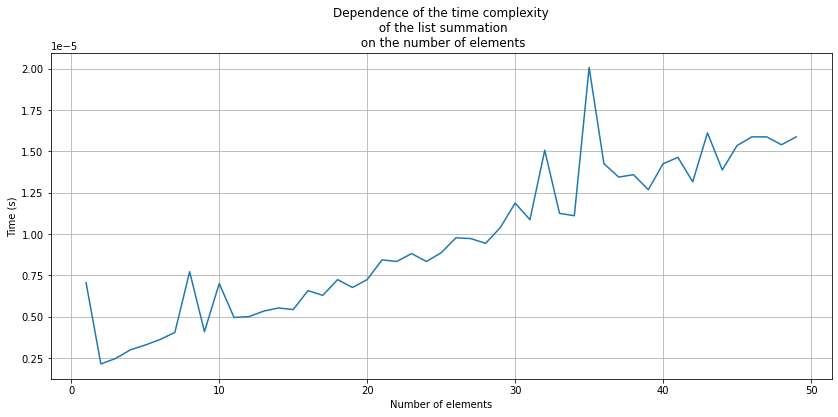

In [127]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 50, 1)
ax.plot(t, summ_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of the list summation\n on the number of elements')
ax.grid()
plt.show()

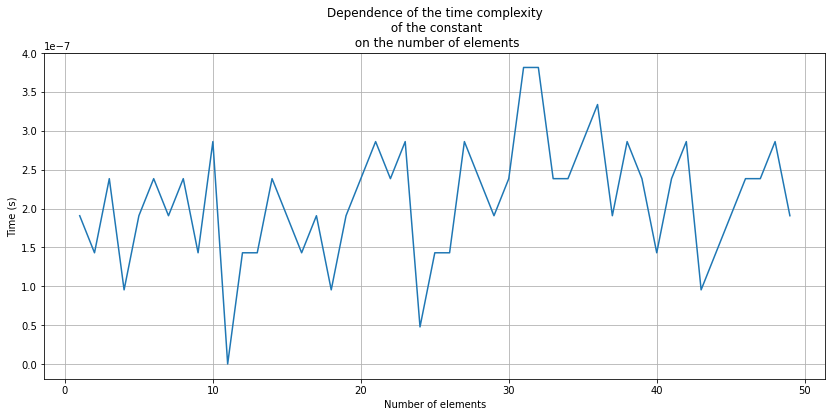

In [128]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 50, 1)
ax.plot(t, const_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of the constant\n on the number of elements')
ax.grid()
plt.show()

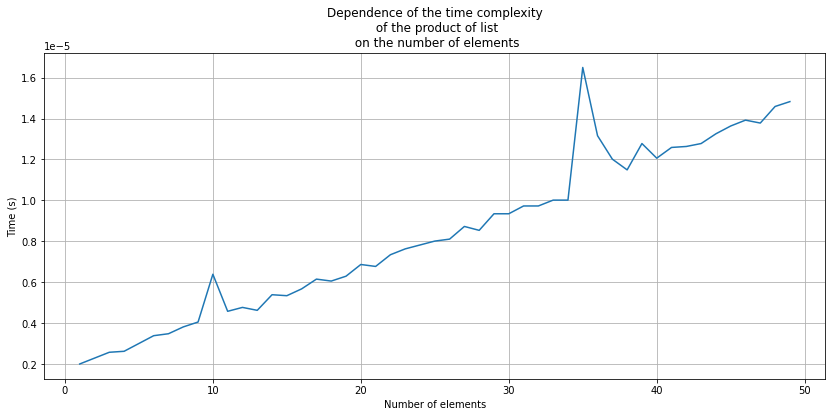

In [129]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 50, 1)
ax.plot(t, pr_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of the product of list\n on the number of elements')
ax.grid()
plt.show()

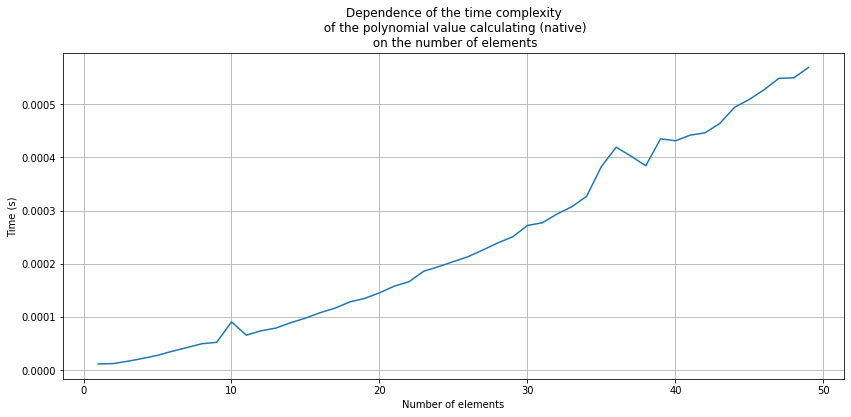

In [130]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 50, 1)
ax.plot(t, native_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of the polynomial value calculating (native)\n on the number of elements')
ax.grid()
plt.show()

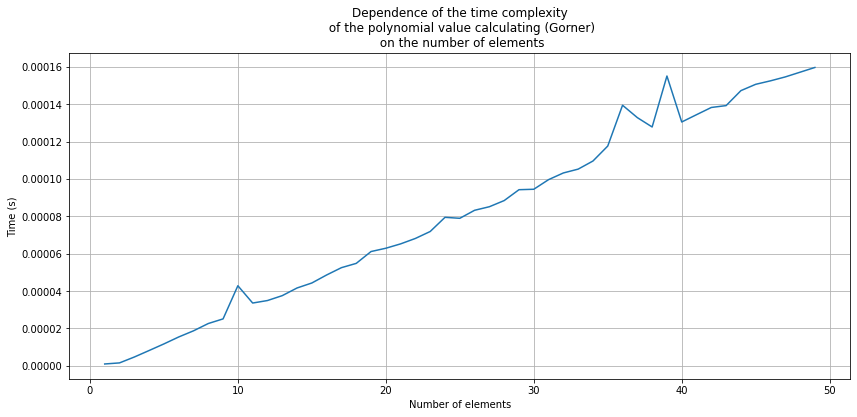

In [131]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 50, 1)
ax.plot(t, gorner_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of the polynomial value calculating (Gorner)\n on the number of elements')
ax.grid()
plt.show()

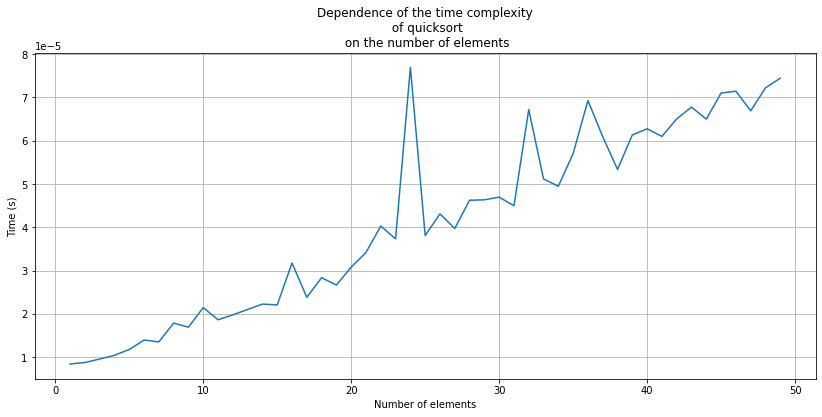

In [132]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 50, 1)
ax.plot(t, qs_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of quicksort\n on the number of elements')
ax.grid()
plt.show()

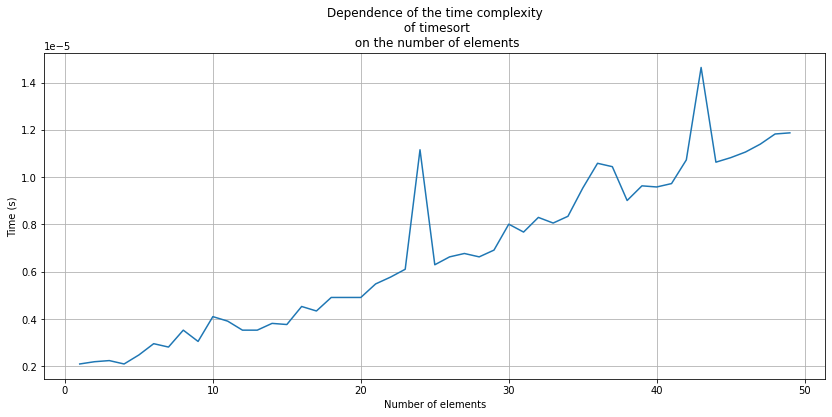

In [133]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 50, 1)
ax.plot(t, timsort_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of timesort\n on the number of elements')
ax.grid()
plt.show()

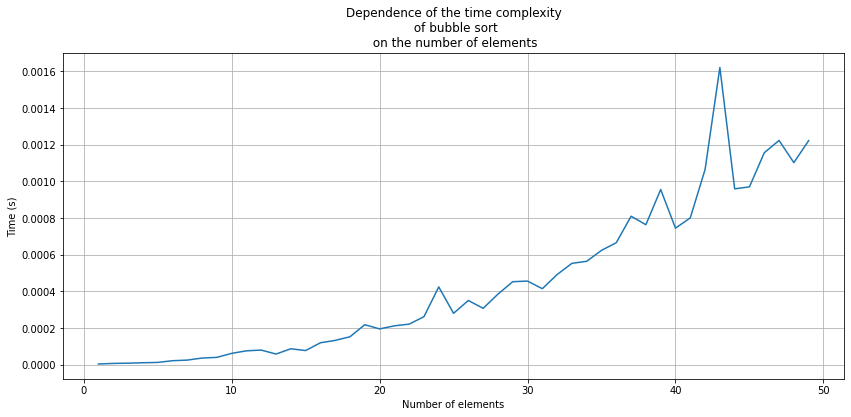

In [134]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 50, 1)
ax.plot(t, bubble_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of bubble sort\n on the number of elements')
ax.grid()
plt.show()

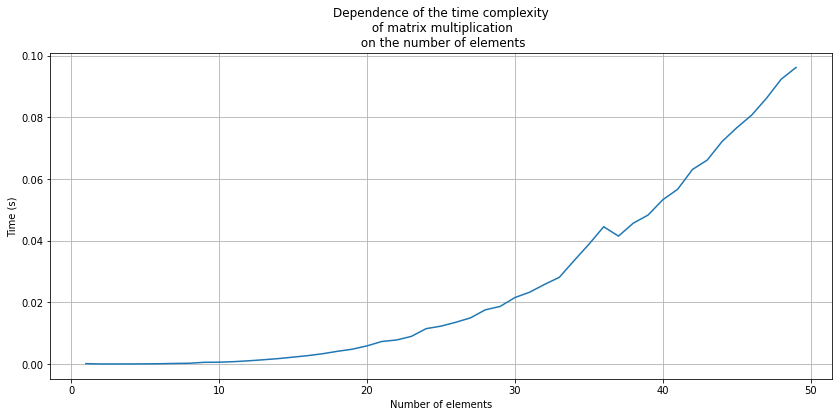

In [135]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 50, 1)
ax.plot(t, matrix_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of matrix multiplication\n on the number of elements')
ax.grid()
plt.show()